In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [127]:
!pip install statsmodels
import statsmodels.api as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the data

In [128]:
data = pd.read_excel('Train.xlsx', header=0)

In [129]:
data.columns = data.iloc[0]
data = data[1:]

In [130]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [131]:
data.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
count,999.0,999.0,999.00,999.0,999.000,999.0,999,999.0000,999.00,999.00,999.0,999
unique,95.0,132.0,79.00,75.0,136.000,54.0,139,239.0000,85.00,88.00,49.0,6
top,7.8,0.5,0.49,2.0,0.084,6.0,15,0.9972,3.26,0.57,9.5,5
freq,37.0,31.0,65.00,92.0,40.000,96.0,24,35.0000,33.00,44.00,103.0,468


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 1 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      999 non-null    object
 1   X2      999 non-null    object
 2   X3      999 non-null    object
 3   X4      999 non-null    object
 4   X5      999 non-null    object
 5   X6      999 non-null    object
 6   X7      999 non-null    object
 7   X8      999 non-null    object
 8   X9      999 non-null    object
 9   X10     999 non-null    object
 10  X11     999 non-null    object
 11  Y       999 non-null    object
dtypes: object(12)
memory usage: 93.8+ KB


In [133]:
data = data.apply(pd.to_numeric, errors='coerce')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 1 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      999 non-null    float64
 1   X2      999 non-null    float64
 2   X3      999 non-null    float64
 3   X4      999 non-null    float64
 4   X5      999 non-null    float64
 5   X6      999 non-null    float64
 6   X7      999 non-null    int64  
 7   X8      999 non-null    float64
 8   X9      999 non-null    float64
 9   X10     999 non-null    float64
 10  X11     999 non-null    float64
 11  Y       999 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [135]:
cols = list(data.columns)

In [136]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

<Axes: >

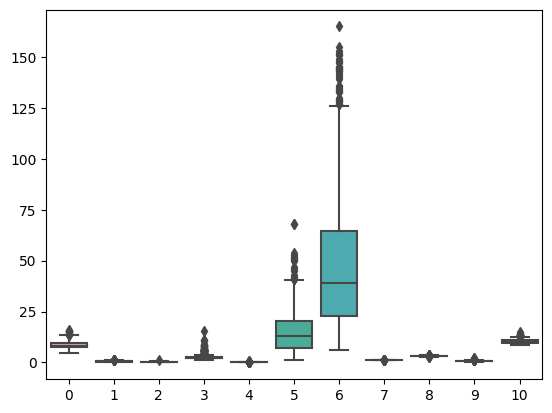

In [137]:
import seaborn as sns

sns.boxplot(data=X)


In [138]:
data = data.apply(pd.to_numeric, errors='coerce')

<Axes: >

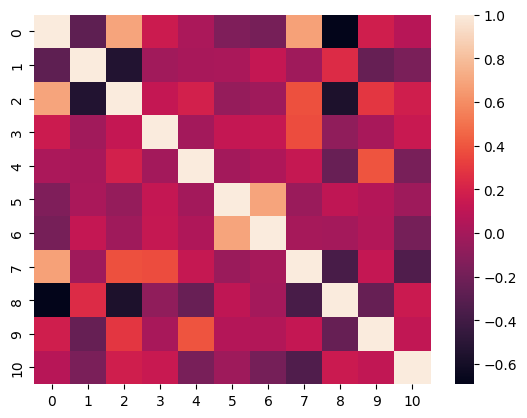

In [139]:
df = pd.DataFrame(X)
sns.heatmap(df.corr())

# Modeling

In [140]:
#random forest regressor
# Train the random forest regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42) # Set the hyperparameters here
regressor.fit(X, y)

# Evaluate the model using metrics such as mean squared error, SSE, R-squared, and adjusted R-squared
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
sse = np.sum(np.square(y - y_pred))
n = len(y)
p = X.shape[1]
r2 = 1 - (sse / ((n-1)*np.var(y)))
adj_r2 = 1 - ((1 - r2)*(n-1)/(n-p-1))

print("Mean Squared Error:", mse)
print("SSE:", sse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)




Mean Squared Error: 0.045092992992993
SSE: 45.047900000000006
R-squared: 0.9292101898947827
Adjusted R-squared: 0.9284212457092129


In [141]:
#XGBoost Model
# Train the XGBoost regression model
regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7) # Set the hyperparameters here
regressor.fit(X, y)

# Evaluate the model using metrics such as mean squared error, SSE, R-squared, and adjusted R-squared
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
sse = np.sum(np.square(y - y_pred))
n = len(y)
p = X.shape[1]
r2 = 1 - (sse / ((n-1)*np.var(y)))
adj_r2 = 1 - ((1 - r2)*(n-1)/(n-p-1))

print("Mean Squared Error:", mse)
print("SSE:", sse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 0.012492656667638307
SSE: 12.480164010970668
R-squared: 0.9803882436158271
Adjusted R-squared: 0.9801696728759832


In [142]:
#Polynomial Regression
# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Train the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

# Make predictions on the training data
y_pred = poly_regressor.predict(X_poly)

# Evaluate the model using metrics such as mean squared error (MSE), sum of squared errors (SSE), R-squared (R2), and adjusted R-squared (Adj R2)
n = len(y)
p = X.shape[1]
mse = mean_squared_error(y, y_pred)
sse = np.sum((y - y_pred)**2)
r2 = poly_regressor.score(X_poly, y)
adj_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))

print("Mean Squared Error:", mse)
print("Sum of Squared Errors:", sse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 0.1797597614498137
Sum of Squared Errors: 179.5800016883639
R-squared: 0.7180843267092072
Adjusted R-squared: 0.7149424093776988
